<a href="https://colab.research.google.com/github/Sourav-Manik/AI_Deep_Learning/blob/main/Denoising_using_Auto_encoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##. 1. Import Necessary Libraries##

In [ ]:
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential

import numpy as np
from matplotlib import pyplot as plt

##2. Import Dataset

In [ ]:
(X_train,_),(X_test,_) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


##3. Data Understanding

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

##4. Data Preprocessing##

In [ ]:
X_train = X_train.astype('float')/255
X_test = X_test.astype('float')/255

In [ ]:
X_train_reshaped = np.reshape(a = X_train, newshape = (60000,28,28,1))
X_test_reshaped = np.reshape(a = X_test, newshape = (10000,28,28,1))
X_train_reshaped.shape, X_test_reshaped.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Note – Before we send the data to encoders it needs to understand if it is a black and white image or a coloured image. Thus, we are adding “1” in the reshaped data which represents a black-and-white image.

Also, add some noise to these train and test images for Noise reduction using Encoder and Decoder blocks.

Before Adding Noise

<function matplotlib.pyplot.show(*args, **kw)>

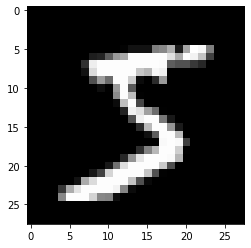

In [ ]:
plt.imshow(X_train[0],cmap = 'gray')
plt.show

###Step 1: Add Noise

In [ ]:
X_train_noisy = X_train_reshaped + 0.2 * np.random.normal(loc = 0.0, scale = 1.0, size = (60000,28,28,1))
X_test_noisy = X_test_reshaped + 0.2 * np.random.normal(loc = 0.0, scale = 1.0, size = (10000,28,28,1))

<function matplotlib.pyplot.show(*args, **kw)>

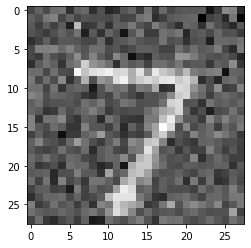

In [ ]:
plt.imshow(X_test_noisy[0].reshape(28,28),cmap = 'gray')
plt.show

###Step 2: Clip your image

In [ ]:
X_train_clipped = np.clip(a = X_train_noisy,a_min = 0, a_max = 10)
X_test_clipped = np.clip(a = X_test_noisy,a_min = 0, a_max = 2)

<function matplotlib.pyplot.show(*args, **kw)>

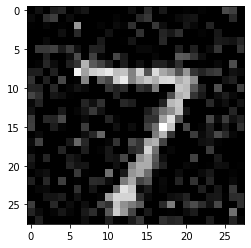

In [ ]:
plt.imshow(X_test_clipped[0].reshape(28,28),cmap = 'gray')
plt.show

Note – here value given in the 'a_max' parameter is to only take that pixel value.  Also, these values are standard deviation values because we have normalized the data.

##5. Model Building

###Encoding Architecture

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape = (28,28,1),filters = 32, kernel_size = (3,3),padding = 'same',strides = 1, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))
model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'same',strides = 1, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))
model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'same',strides = 1, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2,padding = 'same'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 8)         

###Decoding Architecture

In [ ]:
model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'same', activation = 'relu'))
model.add(UpSampling2D(size = (2,2)))
model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'same', activation = 'relu'))
model.add(UpSampling2D(size = (2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(UpSampling2D(size = (2,2)))
model.add(Conv2D(filters = 1, kernel_size = (3,3),padding = 'same', activation = 'relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 8)         

In [ ]:
model.compile(optimizer = 'rmsprop',loss=['mean_squared_error'])

##6. Model Training

In [ ]:
model.fit(x=X_train_clipped,y=X_train,epochs = 25, batch_size = 32, validation_data=(X_test_clipped,X_test))

Epoch 1/25
1875/1875 [==============================] - 146s 77ms/step - loss: 0.0338 - val_loss: 0.0237
Epoch 2/25
1875/1875 [==============================] - 140s 75ms/step - loss: 0.0211 - val_loss: 0.0176
Epoch 3/25
1875/1875 [==============================] - 139s 74ms/step - loss: 0.0178 - val_loss: 0.0154
Epoch 4/25
1875/1875 [==============================] - 139s 74ms/step - loss: 0.0162 - val_loss: 0.0152
Epoch 5/25
1875/1875 [==============================] - 138s 73ms/step - loss: 0.0151 - val_loss: 0.0154
Epoch 6/25
1875/1875 [==============================] - 139s 74ms/step - loss: 0.0144 - val_loss: 0.0144
Epoch 7/25
1875/1875 [==============================] - 140s 74ms/step - loss: 0.0139 - val_loss: 0.0128
Epoch 8/25
1875/1875 [==============================] - 143s 76ms/step - loss: 0.0135 - val_loss: 0.0140
Epoch 9/25
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0132 - val_loss: 0.0131
Epoch 10/25
1875/1875 [==============================] 

##7. Model Evaluation

In [ ]:
model.evaluate(X_test_noisy,X_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.0126


0.012644010595977306

##8. Model Prediction

In [ ]:
y_pred = model.predict(X_test_noisy)

313/313 [==============================] - 7s 22ms/step


<function matplotlib.pyplot.show(*args, **kw)>

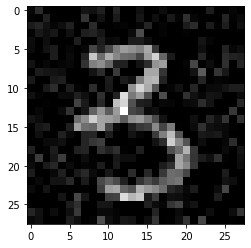

In [ ]:
plt.imshow(X_test_clipped[5000].reshape(28,28),cmap = 'gray')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

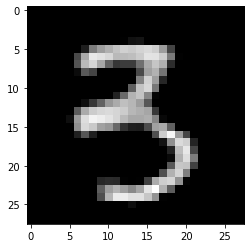

In [ ]:
plt.imshow(y_pred[5000].reshape(28,28),cmap = 'gray')
plt.show

##9. Model Deployment

In [ ]:
model.save('Denoising_images.h5')